In [1]:
# Acquiring data
# Databases
import sqlite3
conn = sqlite3.connect("sql.sqlite")

In [2]:
cursor = conn.cursor()

In [3]:

#Select from the database
cursor.execute("SELECT name From sqlite_master WHERE type='table' ORDER BY name")

In [4]:
#read_data
cursor.fetchall()

[('incidents',), ('officers',), ('subjects',)]

In [5]:
cursor.execute("PRAGMA table_info(officers)").fetchall()

[(0, 'case_number', 'TEXT', 0, None, 0),
 (1, 'race', 'TEXT', 0, None, 0),
 (2, 'gender', 'TEXT', 0, None, 0),
 (3, 'last_name', 'TEXT', 0, None, 0),
 (4, 'first_name', 'TEXT', 0, None, 0),
 (5, 'full_name', 'TEXT', 0, None, 0)]

In [6]:
import pandas as pd

In [7]:
officers = pd.read_sql('SELECT * FROM officers',conn)

In [8]:
officers.head()

,case_number,race,gender,last_name,first_name,full_name
0,44523A,L,M,Patino,Michael,"Patino, Michael"
1,44523A,W,M,Fillingim,Brian,"Fillingim, Brian"
2,121982X,L,M,Padilla,Gilbert,"Padilla, Gilbert"
3,605484T,W,M,Poston,Jerry,"Poston, Jerry"
4,384832T,B,M,Mondy,Michael,"Mondy, Michael"


In [9]:
# Sql join syntax
officers = pd.read_sql('SELECT * FROM officers JOIN incidents ON officers.case_number=incidents.case_number',conn)

In [10]:
officers.head()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,L,M,Patino,Michael,"Patino, Michael",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,44523A,W,M,Fillingim,Brian,"Fillingim, Brian",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
2,121982X,L,M,Padilla,Gilbert,"Padilla, Gilbert",121982X,2010-05-03,1300 N. Munger Boulevard,Injured,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
3,605484T,W,M,Poston,Jerry,"Poston, Jerry",605484T,2007-08-12,200 S. Stemmons Freeway,Other,...,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
4,384832T,B,M,Mondy,Michael,"Mondy, Michael",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN


In [11]:
# Project shooting in Dallas Visualization 
import matplotlib.pyplot as plt


In [12]:
incidents = pd.read_sql('SELECT * FROM incidents',conn)
incidents.head()

,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,2013-02-23,3000 Chihuahua Street,Injured,Handgun,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,2010-05-03,1300 N. Munger Boulevard,Injured,Handgun,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,2007-08-12,200 S. Stemmons Freeway,Other,Shotgun,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,Unarmed,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,244659R,2006-04-03,6512 South Loop 12,Injured,Hands,"Watkins, Caleb B/M",1,"Armstrong, Michael W/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, April 3, 2006, at approximately 11:...",NaN,NaN


In [13]:
subjects = pd.read_sql('SELECT * FROM subjects',conn)
subjects.head()

,case_number,race,gender,last_name,first_name,full_name
0,44523A,L,M,Curry,James,"Curry, James"
1,121982X,L,M,Chavez,Gabriel,"Chavez, Gabriel"
2,605484T,L,M,Salinas,Nick,"Salinas, Nick"
3,384832T,B,M,Smith,James,"Smith, James"
4,384832T,B,M,Dews,Antonio,"Dews, Antonio"


In [14]:
# Sql join syntax
officers = pd.read_sql('SELECT * FROM officers JOIN incidents ON officers.case_number=incidents.case_number',conn)

In [15]:
officers.head()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,L,M,Patino,Michael,"Patino, Michael",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,44523A,W,M,Fillingim,Brian,"Fillingim, Brian",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
2,121982X,L,M,Padilla,Gilbert,"Padilla, Gilbert",121982X,2010-05-03,1300 N. Munger Boulevard,Injured,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
3,605484T,W,M,Poston,Jerry,"Poston, Jerry",605484T,2007-08-12,200 S. Stemmons Freeway,Other,...,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
4,384832T,B,M,Mondy,Michael,"Mondy, Michael",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN


In [18]:
#officers = pd.read_sql('SELECT * FROM officers JOIN subjects incidents ON officers.case_number=subjects.case_number=incidents.case_number',conn)
#officers.head()

In [19]:
officers.dtypes

case_number                    object
race                           object
gender                         object
last_name                      object
first_name                     object
full_name                      object
case_number                    object
date                           object
location                       object
subject_statuses               object
subject_weapon                 object
subjects                       object
subject_count                   int64
officers                       object
officer_count                   int64
grand_jury_disposition         object
attorney_general_forms_url     object
summary_url                    object
summary_text                   object
latitude                      float64
longitude                     float64
dtype: object

In [20]:
officers.isnull().sum()

case_number                     0
race                            4
gender                          0
last_name                       0
first_name                      3
full_name                       0
case_number                     0
date                            0
location                        0
subject_statuses                0
subject_weapon                  0
subjects                        0
subject_count                   0
officers                        0
officer_count                   0
grand_jury_disposition        112
attorney_general_forms_url    365
summary_url                    14
summary_text                   14
latitude                       10
longitude                      10
dtype: int64

In [21]:
#officers=officers.dropna(axis='columns')

In [22]:
officers.head()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,L,M,Patino,Michael,"Patino, Michael",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,44523A,W,M,Fillingim,Brian,"Fillingim, Brian",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
2,121982X,L,M,Padilla,Gilbert,"Padilla, Gilbert",121982X,2010-05-03,1300 N. Munger Boulevard,Injured,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
3,605484T,W,M,Poston,Jerry,"Poston, Jerry",605484T,2007-08-12,200 S. Stemmons Freeway,Other,...,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
4,384832T,B,M,Mondy,Michael,"Mondy, Michael",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN


In [23]:
officers.shape

(370, 21)

In [24]:
officers.groupby('gender').count()

,case_number,race,last_name,first_name,full_name,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
gender,,,,,,,,,,,,,,,,,,,,
F,19,18,19,18,19,19,19,19,19,19,19,19,19,19,15,0,19,19,19,19
M,351,348,351,349,351,351,351,351,351,351,351,351,351,351,243,5,337,337,341,341


In [25]:
officers.groupby('race').count()

,case_number,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
race,,,,,,,,,,,,,,,,,,,,
A,12,12,12,12,12,12,12,12,12,12,12,12,12,12,8,0,11,11,12,12
B,68,68,68,68,68,68,68,68,68,68,68,68,68,68,42,1,66,66,66,66
L,79,79,79,77,79,79,79,79,79,79,79,79,79,79,51,2,78,78,75,75
W,207,207,207,206,207,207,207,207,207,207,207,207,207,207,154,2,197,197,203,203


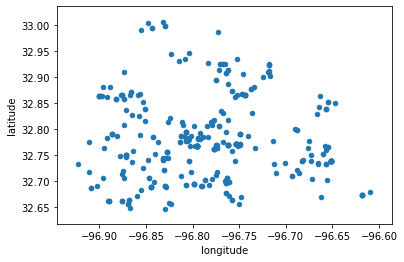

In [26]:
officers.plot.scatter('longitude','latitude')

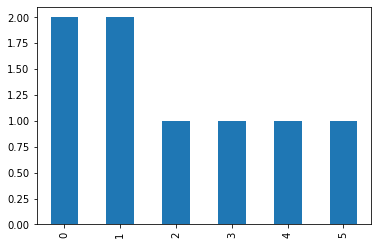

In [27]:
officers['officer_count'].loc[:5].plot.bar()

In [28]:
mapping = {'A':'r','B':'b','L':'c','W':'y'}

In [29]:
data = officers
data.head()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,L,M,Patino,Michael,"Patino, Michael",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,44523A,W,M,Fillingim,Brian,"Fillingim, Brian",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
2,121982X,L,M,Padilla,Gilbert,"Padilla, Gilbert",121982X,2010-05-03,1300 N. Munger Boulevard,Injured,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
3,605484T,W,M,Poston,Jerry,"Poston, Jerry",605484T,2007-08-12,200 S. Stemmons Freeway,Other,...,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
4,384832T,B,M,Mondy,Michael,"Mondy, Michael",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN


In [30]:
mapping = {'A':'r','B':'b','L':'c','W':'y'}
data['race']= data['race'].apply(lambda x:mapping[x])

KeyError: None

In [ ]:
pip install folium


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import folium 
m = folium.Map(location=[data['latitude'],data['longitude']])

In [18]:
subject_incidents = pd.read_sql('SELECT * FROM subjects JOIN incidents on subjects.case_number=incidents.case_number',conn)

In [19]:
subject_incidents.head()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,L,M,Curry,James,"Curry, James",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,L,M,Chavez,Gabriel,"Chavez, Gabriel",121982X,2010-05-03,1300 N. Munger Boulevard,Injured,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,L,M,Salinas,Nick,"Salinas, Nick",605484T,2007-08-12,200 S. Stemmons Freeway,Other,...,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,B,M,Smith,James,"Smith, James",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,384832T,B,M,Dews,Antonio,"Dews, Antonio",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN


In [20]:
subject_incidents.dtypes

case_number                    object
race                           object
gender                         object
last_name                      object
first_name                     object
full_name                      object
case_number                    object
date                           object
location                       object
subject_statuses               object
subject_weapon                 object
subjects                       object
subject_count                   int64
officers                       object
officer_count                   int64
grand_jury_disposition         object
attorney_general_forms_url     object
summary_url                    object
summary_text                   object
latitude                      float64
longitude                     float64
dtype: object

In [21]:
subject_incidents.isnull().sum()

case_number                     0
race                            0
gender                          0
last_name                       0
first_name                     18
full_name                       0
case_number                     0
date                            0
location                        0
subject_statuses                0
subject_weapon                  0
subjects                        0
subject_count                   0
officers                        0
officer_count                   0
grand_jury_disposition         88
attorney_general_forms_url    221
summary_url                     3
summary_text                    3
latitude                        9
longitude                       9
dtype: int64

In [22]:
subject_incidents.groupby('subject_statuses').count()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
subject_statuses,,,,,,,,,,,,,,,,,,,,
1 Deceased 1 Injured,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
2 Injured,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
Deceased,69,69,69,69,67,69,69,69,69,69,69,69,69,69,67,1,67,67,68,68
Deceased Injured,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
Injured,60,60,60,60,60,60,60,60,60,60,60,60,60,60,58,1,60,60,57,57
Other,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,2,2,1,1
Shoot and Miss,87,87,87,87,71,87,87,87,87,87,87,87,87,87,4,0,86,86,83,83


In [23]:
subject_incidents.groupby('race').count()

,case_number,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
race,,,,,,,,,,,,,,,,,,,,
A,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2,2,2
B,111,111,111,104,111,111,111,111,111,111,111,111,111,111,67,0,109,109,106,106
L,72,72,72,61,72,72,72,72,72,72,72,72,72,72,37,2,71,71,68,68
W,38,38,38,38,38,38,38,38,38,38,38,38,38,38,31,0,38,38,38,38


In [24]:
subject_incidents.groupby('gender').count()

,case_number,race,last_name,first_name,full_name,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
gender,,,,,,,,,,,,,,,,,,,,
F,8,8,8,7,8,8,8,8,8,8,8,8,8,8,5,0,8,8,8,8
M,215,215,215,198,215,215,215,215,215,215,215,215,215,215,130,2,212,212,206,206


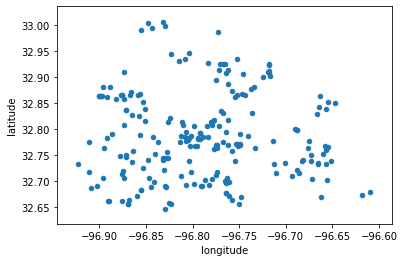

In [25]:
subject_incidents.plot.scatter('longitude','latitude')

In [27]:
# Feature Selection 
data = subject_incidents[['race','subject_statuses','longitude','latitude']].dropna()

In [28]:
len(data)

214

In [29]:
# map the race values by color values
mapping = {'A':'r','B':'b','L':'c','W':'y'}


In [30]:
data['race']= data['race'].apply(lambda x:mapping[x])

In [31]:
data.head()

,race,subject_statuses,longitude,latitude
9,c,Deceased,-96.908674,32.68642
10,b,Deceased,-96.898998,32.86400
11,y,Shoot and Miss,-96.826787,32.81482
12,b,Injured,-96.767489,32.77540
13,b,Shoot and Miss,-96.828470,32.74417


In [32]:
mapping = {'Deceased':1000,'Injured':500,'Shoot and Miss':250}

In [33]:
data['subject_statuses']= data['subject_statuses'].apply(lambda x: mapping.get(x,100))

In [39]:
data.head()

,race,subject_statuses,longitude,latitude
9,c,1000,-96.908674,32.68642
10,b,1000,-96.898998,32.86400
11,y,250,-96.826787,32.81482
12,b,500,-96.767489,32.77540
13,b,250,-96.828470,32.74417


TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

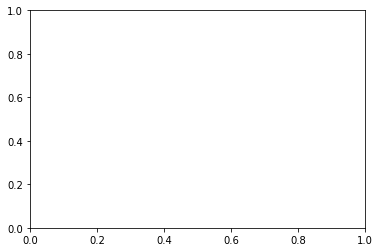

In [45]:
data.plot.scatter(x='longitude', y='latitude', s='subject_statuses', c='race', alpha=.25)